<a href="https://colab.research.google.com/github/mohaktiwari/MarvelTasks/blob/main/KNNFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import numpy as np
from collections import Counter

#Defining a function for finding the euclidian distance
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k):
        #Intialising the k value
        self.k = k

    #Defining the fit() function
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    #Defining the predict() function
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    #Defining another predict function to find predictions for every single point
    def _predict(self, x):
        #Finding euclidian distance of one point to every other point
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        #Finding the indices and labels of the k nearest elements
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        #Finding the most common label
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

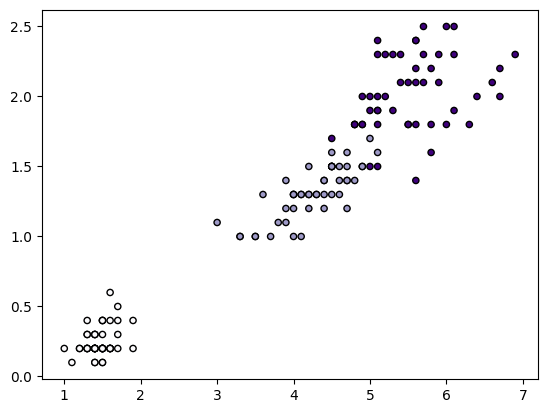


 [1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0] 

The accuracy is: 0.9666666666666667


In [2]:
#Importing the libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Loading the dataset and assigning X and y values
iris = datasets.load_iris()
X, y = iris.data, iris.target

#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Plotting the dataset values on a scatter plot
plt.figure()
plt.scatter(X[:,2],X[:,3],c=y,cmap='Purples',edgecolor='k', s=20)
plt.show()

#Creating a KNN classifier
clf = KNN(k=5)

#Fitting the training data
clf.fit(X_train, y_train)

#Predicting the y values using the test values
predictions = clf.predict(X_test)
print("\n",predictions,"\n")

#Calculating the accuracy
acc = np.sum(predictions == y_test) / len(y_test)
print("The accuracy is:",acc)